#### **Ejercicio:** Ejercicio sobre RNC

**Elaborado por:** Fabian Villarreal Sosa

El conjunto de datos de moda MNIST es otro conjunto popular para la evaluación de modelos de visión computarizada. Consiste de 60,000 imágenes de entrenamiento, cada una es una imagen en escala de grises de 28x28, proveniente de 1 de 10 clases:

    0 Polera/top
    1 Pantalón
    2 Suéter
    3 Vestido
    4 Abrigo
    5 Sandalia
    6 Camisa
    7 Zapatilla
    8 Bolso
    9 Botín 

Tu tarea es usar una RNC para clasificar las imágenes como uno de los 10 artículos de vestimenta. Puedes descargar los datos desde [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist). Trata de construir el mejor modelo posible (que tenga la mayor precisión en los datos de prueba).

In [89]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [90]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [92]:
# Datos
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [93]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Datos: 
* Each value is the darkness of the pixel (1 to 255)
* Each image is 28 pixels in height and 28 pixels in width

In [95]:
# Definir conjunto de variables explicativas y variable dependiente
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

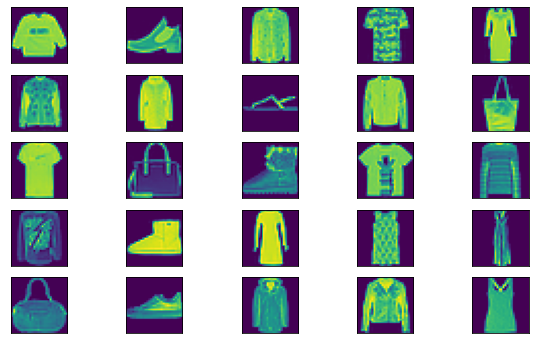

In [96]:
# Fuente: https://www.kaggle.com/pavansanagapati/a-simple-cnn-model-beginner-guide

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i].reshape((28, 28)))
  label_index = int(y_train[i])
  
plt.gcf().set_size_inches(10 ,6);

In [97]:
# Escalar datos
X_train = X_train / 255
X_test = X_test / 255 

In [98]:
print('Train', X_train.shape)
print('Test', X_test.shape)

Train (60000, 784)
Test (10000, 784)


In [99]:
# Cambiar variable dependiente a categorica
ytrain = len(set(y_train))
ytest = len(set(y_test))

In [100]:
y_train = to_categorical(y_train, num_classes = ytrain)
y_test = to_categorical(y_test, num_classes = ytest)

In [101]:
# Reformar datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**Modelo RCN**

Definir la estructura de la red

In [102]:
# Forma de entrada
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [103]:
# Modelo secuencial
model_1 = Sequential()

In [104]:
# Capa convolucional
model_1.add(Conv2D(filters = 16, # Cantidad de filtros a usar
                   kernel_size = 3, # Tamano de cada filtro
                   input_shape = input_shape)) # Forma de las caracteristicas de entrada

# Capa pooling
model_1.add(MaxPooling2D(pool_size = 2)) # Tamano de pooling

# Capa de aplanamiento
model_1.add(Flatten())

# Capa de salida
model_1.add(Dense(10, # Posibilidades de salida
                activation = 'softmax')) # Funcion de activacion a usar

Compilar el modelo

In [105]:
# Compilar
model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

Ajustar el modelo

In [106]:
# Ajustar el modelo
history = model_1.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4992 - acc: 0.8246 - val_loss: 0.3979 - val_acc: 0.8632
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3703 - acc: 0.8721 - val_loss: 0.3596 - val_acc: 0.8740
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3368 - acc: 0.8820 - val_loss: 0.3253 - val_acc: 0.8895
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3139 - acc: 0.8906 - val_loss: 0.3298 - val_acc: 0.8862
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2975 - acc: 0.8961 - val_loss: 0.3250 - val_acc: 0.8865
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2824 - acc: 0.9008 - val_loss: 0.3081 - val_acc: 0.8936
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2724 - acc: 0.9033 - val_loss: 0.3009 - val_acc: 0.8960
Epoch 8/20
1875/1875 [==========================

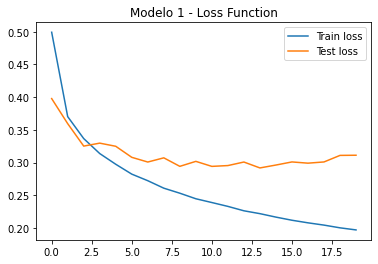

In [107]:
# Visualizar la perdida
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.title('Modelo 1 - Loss Function')
plt.legend();

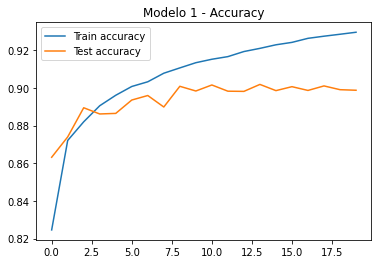

In [108]:
# Visualizar la precision
plt.plot(history.history['acc'], label = 'Train accuracy')
plt.plot(history.history['val_acc'], label = 'Test accuracy')
plt.title('Modelo 1 - Accuracy')
plt.legend();

Con dropout (dilución)

Definir la estructura de la red

In [109]:
# Modelo secuencial
model_2 = Sequential()

In [110]:
# Capa convolucional
model_2.add(Conv2D(filters = 16, # Cantidad de filtros a usar
                   kernel_size = 3, # Tamano de cada filtro
                   input_shape = input_shape)) # Forma de las caracteristicas de entrada

model_2.add(Dropout(.2)) # Dilucion

# Capa pooling
model_2.add(MaxPooling2D(pool_size = 2)) # Tamano de pooling

model_2.add(Dropout(.2)) # Dilucion

# Capa de aplanamiento
model_2.add(Flatten())

model_2.add(Dropout(.2)) # Dilucion

# Capa de salida
model_2.add(Dense(10, # Posibilidades de salida
                activation = 'softmax')) # Funcion de activacion a usar

Compilar el modelo

In [111]:
# Compilar
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

Ajustar el modelo

In [112]:
# Ajustar el modelo
history = model_2.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5204 - acc: 0.8147 - val_loss: 0.4521 - val_acc: 0.8391
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3958 - acc: 0.8603 - val_loss: 0.4190 - val_acc: 0.8494
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3689 - acc: 0.8711 - val_loss: 0.4054 - val_acc: 0.8562
Epoch 4/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3541 - acc: 0.8750 - val_loss: 0.3561 - val_acc: 0.8787
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3448 - acc: 0.8778 - val_loss: 0.3670 - val_acc: 0.8695
Epoch 6/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3380 - acc: 0.8798 - val_loss: 0.3284 - val_acc: 0.8848
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3333 - acc: 0.8812 - val_loss: 0.3336 - val_acc: 0.8839
Epoch 8/20
1875/1875 [==========================

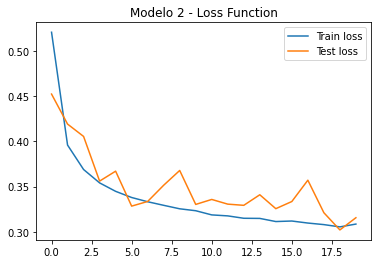

In [113]:
# Visualizar la perdida
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.title('Modelo 2 - Loss Function')
plt.legend();

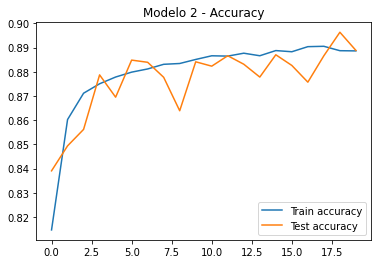

In [114]:
# Visualizar la precision
plt.plot(history.history['acc'], label = 'Train accuracy')
plt.plot(history.history['val_acc'], label = 'Test accuracy')
plt.title('Modelo 2 - Accuracy')
plt.legend();